In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import json
from shapely.geometry import Point

In [2]:
df_pozos_cap4 = pd.read_csv('./data/capitulo-iv-pozos.csv')
df_pozos_general_2024 = pd.read_csv('./data/produccin-de-pozos-de-gas-y-petrleo-2024.csv', low_memory=False)
df_pozos_noconvencional = pd.read_csv('./data/produccin-de-pozos-de-gas-y-petrleo-no-convencional.csv', low_memory=False)
provinces_gdf = gpd.read_file('./data/provincia/provincia.shp')


In [4]:
df_pozos_cap4.head()

,sigla,idpozo,area,cod_area,empresa,yacimiento,cod_yacimiento,formacion,cuenca,provincia,...,gasplus,tipopozo,tipoextraccion,tipoestado,adjiv_fecha_inicio_perf,adjiv_fecha_fin_perf,adjiv_fecha_inicio_term,adjiv_fecha_fin_term,geojson,geom
0,CH.CH.EaLE.x-1,212,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1996-10-30,1996-11-13,1996-11-17,1996-12-07,"{""type"":""Point"",""coordinates"":[-68.28785299999...",0101000020E61000008D43FD2E6C1251C00E4B033FAACB...
1,CH.CH.EaLE.x-2,213,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Inyección de Agua,Sin Sistema de Extracción,En Inyección Efectiva,1996-10-14,1996-11-13,1996-12-09,1996-12-17,"{""type"":""Point"",""coordinates"":[-68.29201899999...",0101000020E6100000E1B37570B01251C00BB5A679C7CB...
2,CH.CH.EaLE-3,214,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-30,1997-02-07,1997-03-02,1997-03-10,"{""type"":""Point"",""coordinates"":[-68.28387800000...",0101000020E61000007383A10E2B1251C082548A1D8DCB...
3,CH.CH.EaLE-4,215,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-01-13,1997-01-20,1997-01-23,1997-02-07,"{""type"":""Point"",""coordinates"":[-68.28948300000...",0101000020E6100000DF6FB4E3861251C0A148F7730ACC...
4,CH.CH.EaLE-5,216,ESTANCIA LA ESCONDIDA,ECH,COLHUE HUAPI S.A.,ESTANCIA LA ESCONDIDA,ELA,comodoro rivadavia,GOLFO SAN JORGE,Chubut,...,no,Petrolífero,Bombeo Mecánico,Extracción Efectiva,1997-02-16,1997-02-24,1997-03-10,1997-03-18,"{""type"":""Point"",""coordinates"":[-68.29447500000...",0101000020E6100000569FABADD81251C0B98D06F016CC...


In [23]:
df_pozos_cap4.shape

(84282, 27)

In [5]:
df_pozos_general_2024.head()

,idempresa,anio,mes,idpozo,prod_pet,prod_gas,prod_agua,iny_agua,iny_gas,iny_co2,...,idareayacimiento,areayacimiento,cuenca,provincia,tipo_de_recurso,proyecto,clasificacion,subclasificacion,sub_tipo_recurso,fecha_data
0,Z001,2024,1,32186,0.0,0.0,0.0,0.0,0.0,0.0,...,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
1,Z001,2024,1,144117,0.0,0.0,0.0,0.0,0.0,0.0,...,PUSU,PUESTO SURVELIN,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
2,Z001,2024,1,145614,0.0,0.0,0.0,0.0,0.0,0.0,...,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31
3,Z001,2024,1,145615,0.0,0.0,0.0,0.0,0.0,0.0,...,FDRO,FLOR DE ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,SERVICIO,SUMIDERO,NaN,2024-01-31
4,Z001,2024,1,145626,0.0,0.0,0.0,0.0,0.0,0.0,...,AGR,GENERAL ROCA,NEUQUINA,Rio Negro,CONVENCIONAL,Sin Proyecto,EXPLORACION,EXPLORACION,NaN,2024-01-31


## Unicidad

**Capítulo IV Pozos**

In [6]:
df_pozos_cap4.columns

Index(['sigla', 'idpozo', 'area', 'cod_area', 'empresa', 'yacimiento',
       'cod_yacimiento', 'formacion', 'cuenca', 'provincia', 'cota',
       'profundidad', 'clasificacion', 'subclasificacion', 'tipo_recurso',
       'sub_tipo_recurso', 'gasplus', 'tipopozo', 'tipoextraccion',
       'tipoestado', 'adjiv_fecha_inicio_perf', 'adjiv_fecha_fin_perf',
       'adjiv_fecha_inicio_term', 'adjiv_fecha_fin_term', 'geojson', 'geom'],
      dtype='object')

Conceptualmente, la clave primaria de cada observación es el campo "id_pozo". Sin embargo, en el caso de los datos de producción de pozos convencionales y no convencionales, la clave primaria es la combinación de los campos "id_pozo".

In [7]:
unique_pozos = df_pozos_cap4[['idpozo']].drop_duplicates()
print('Proporción de pozos únicos:', f"{unique_pozos.shape[0] / df_pozos_cap4.shape[0]:.3%}")

Proporción de pozos únicos: 100.000%


**Producción general**

Acá tenemos otros datos (mes, año, empresa). Estas se agregan a la clave

In [8]:
df_pozos_general_2024.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'tipo_de_recurso', 'proyecto',
       'clasificacion', 'subclasificacion', 'sub_tipo_recurso', 'fecha_data'],
      dtype='object')

In [10]:
df_pozos_general_2024.shape

(818788, 38)

In [9]:
unique_pozos = df_pozos_general_2024[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
print('Proporción de registros únicos:', f"{unique_pozos.shape[0] / df_pozos_general_2024.shape[0]:.3%}")

Proporción de registros únicos: 100.000%


**No convencional**

In [28]:
df_pozos_noconvencional.columns

Index(['idempresa', 'anio', 'mes', 'idpozo', 'prod_pet', 'prod_gas',
       'prod_agua', 'iny_agua', 'iny_gas', 'iny_co2', 'iny_otro', 'tef',
       'vida_util', 'tipoextraccion', 'tipoestado', 'tipopozo',
       'observaciones', 'fechaingreso', 'rectificado', 'habilitado',
       'idusuario', 'empresa', 'sigla', 'formprod', 'profundidad', 'formacion',
       'idareapermisoconcesion', 'areapermisoconcesion', 'idareayacimiento',
       'areayacimiento', 'cuenca', 'provincia', 'coordenadax', 'coordenaday',
       'tipo_de_recurso', 'proyecto', 'clasificacion', 'subclasificacion',
       'sub_tipo_recurso', 'fecha_data'],
      dtype='object')

In [11]:
df_pozos_noconvencional.shape

(324077, 41)

In [10]:
unique_pozos = df_pozos_noconvencional[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
print('Proporción de registros únicos:', f"{unique_pozos.shape[0] / df_pozos_noconvencional.shape[0]:.3%}")

Proporción de registros únicos: 100.000%


## Consistencia dentro de cada fuente

#### **Capítulo IV Pozos**

**Cada `id_pozo` debe tener una única sigla, y viceversa.**

In [11]:
unique_sigla = df_pozos_cap4[['sigla']].drop_duplicates()
unique_pozos = df_pozos_cap4[['idpozo']].drop_duplicates()
print('Razón entre siglas únicas y IDs únicos:', f"{unique_sigla.shape[0] / unique_pozos.shape[0]:.3f}")

Razón entre siglas únicas y IDs únicos: 0.914


Hay IDs para los cuales se repite la sigla, pues hay más IDs que siglas, lo cual representa un problema.

**Cada `id_pozo` debe tener una única coordenada, y viceversa.**

In [12]:
unique_coord = df_pozos_cap4[['geojson']].drop_duplicates()
unique_pozos = df_pozos_cap4[['idpozo']].drop_duplicates()
print('Razón entre coordenadas únicas y IDs únicos:', f"{unique_coord.shape[0] / unique_pozos.shape[0]:.3f}")

Razón entre coordenadas únicas y IDs únicos: 0.923


In [13]:
df_pozos_cap4[['geojson']].value_counts()

geojson                                                                 
{"type":"Point","coordinates":[-68.252159000000006,-52.570556000000003]}    24
{"type":"Point","coordinates":[-68.311398999999994,-52.549014999999997]}    24
{"type":"Point","coordinates":[-68.384549000000007,-52.531370000000003]}    22
{"type":"Point","coordinates":[-70.008876999999998,-45.972410000000004]}    11
{"type":"Point","coordinates":[-68.280359000000004,-52.522579]}             10
                                                                            ..
{"type":"Point","coordinates":[-67.998825179999997,-45.861947950000001]}     1
{"type":"Point","coordinates":[-67.998766000000003,-46.778046260000004]}     1
{"type":"Point","coordinates":[-67.998730940000002,-46.725223479999997]}     1
{"type":"Point","coordinates":[-67.998699999999999,-46.685639999999999]}     1
{"type":"Point","coordinates":[-72.105900000000005,-50.998550000000002]}     1
Name: count, Length: 77757, dtype: int64

Un problema similar al de las siglas ocurre para las coordenadas.

**La fecha de inicio de perforación debe ser menor a la fecha de fin de perforación.**

In [28]:
df_pozos_cap4['adjiv_fecha_inicio_perf'] = pd.to_datetime(df_pozos_cap4['adjiv_fecha_inicio_perf'])
df_pozos_cap4['adjiv_fecha_fin_perf'] = pd.to_datetime(df_pozos_cap4['adjiv_fecha_fin_perf'])
fechas_inicio = df_pozos_cap4[~df_pozos_cap4['adjiv_fecha_fin_perf'].isna()]['adjiv_fecha_inicio_perf'] 
fechas_fin = df_pozos_cap4[~df_pozos_cap4['adjiv_fecha_fin_perf'].isna()]['adjiv_fecha_fin_perf']

print("Proporción de fechas donde el inicio es anterior al fin:", f"{(fechas_inicio <= fechas_fin).sum() / df_pozos_cap4.shape[0]:.3%}")

Proporción de fechas donde el inicio es anterior al fin: 59.319%


**La provincia reportada es correcta de acuerdo con la localización**

In [24]:
def extract_coordinates(geojson_str):
    geojson = json.loads(geojson_str)
    return Point(geojson['coordinates'][0], geojson['coordinates'][1])

df_pozos_cap4['geometry'] = df_pozos_cap4['geojson'].apply(extract_coordinates)

gdf = gpd.GeoDataFrame(df_pozos_cap4, geometry='geometry', crs=provinces_gdf.crs)
joined = gpd.sjoin(gdf, provinces_gdf, how="left")

joined['is_correct'] = joined['provincia'] == joined['nam'] 

print('Proporción de provincias correctas:', f"{joined['is_correct'].sum() / joined.shape[0]:.3%}")

Proporción de provincias correctas: 91.131%


In [27]:
joined[joined['is_correct'] == False][['provincia', 'nam']].value_counts(normalize=True)

provincia         nam                                                  
Rio Negro         Río Negro                                                0.832583
Tierra del Fuego  Tierra del Fuego, Antártida e Islas del Atlántico Sur    0.162480
Neuquén           Río Negro                                                0.001888
Rio Negro         La Pampa                                                 0.001597
                  Neuquén                                                  0.000436
Neuquén           Mendoza                                                  0.000290
Mendoza           Chubut                                                   0.000145
                  La Pampa                                                 0.000145
                  Neuquén                                                  0.000145
                  San Luis                                                 0.000145
Salta             Jujuy                                                    0.000145
Name

#### **No convencional**

In [15]:
tipo_recurso_no_conv = np.sum(df_pozos_noconvencional['tipo_de_recurso'] == 'NO CONVENCIONAL')
print('Proporción de pozos no convencionales:', f"{tipo_recurso_no_conv / df_pozos_noconvencional.shape[0]:.3%}")

Proporción de pozos no convencionales: 100.000%


**Cada `id_pozo` debe tener una única sigla, y viceversa.**

In [16]:
unique_sigla = df_pozos_noconvencional[['sigla', 'idempresa', 'anio', 'mes']].drop_duplicates()
unique_pozos = df_pozos_noconvencional[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
print('Razón entre siglas únicas y IDs únicos:', f"{unique_sigla.shape[0] / unique_pozos.shape[0]:.3f}")

Razón entre siglas únicas y IDs únicos: 0.943


**Cada `id_pozo` debe tener su coordenada, y viceversa.**

In [17]:
unique_coord =  df_pozos_noconvencional[['coordenadax', 'coordenaday', 'idempresa', 'anio', 'mes']].drop_duplicates()
unique_pozos =  df_pozos_noconvencional[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
print('Razón entre coordenadas únicas y IDs únicos:', f"{unique_coord.shape[0] / unique_pozos.shape[0]:.3f}")

Razón entre coordenadas únicas y IDs únicos: 0.947


**El valor reportado de `provincia` es correcto de acuerdo a las coordenadas**

In [7]:
no_convencional_unique = df_pozos_noconvencional[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
no_convencional_unique.shape[0] / df_pozos_noconvencional.shape[0]

1.0

In [8]:
def extract_coordinates(row):
    return Point(row['coordenadax'], row['coordenaday'])

df_pozos_noconvencional['geometry'] = df_pozos_noconvencional.apply(extract_coordinates, axis=1)

gdf = gpd.GeoDataFrame(df_pozos_noconvencional, geometry='geometry', crs=provinces_gdf.crs)
joined_no_convencional = gpd.sjoin(gdf, provinces_gdf, how="left")

joined_no_convencional['is_correct'] = joined_no_convencional['provincia'] == joined_no_convencional['nam'] 

print('Proporción de provincias correctas:', f"{joined_no_convencional['is_correct'].sum() / joined_no_convencional.shape[0]:.3%}")

Proporción de provincias correctas: 92.375%


In [9]:
joined_no_convencional[joined_no_convencional['is_correct'] == False][['provincia', 'nam']].value_counts(normalize=True)

provincia  nam      
Rio Negro  Río Negro    0.994324
Neuquén    Río Negro    0.005676
Name: proportion, dtype: float64

#### **Producción general 2024**

In [18]:
unique_sigla = df_pozos_general_2024[['sigla', 'idempresa', 'anio', 'mes']].drop_duplicates()
unique_pozos = df_pozos_general_2024[['idpozo', 'idempresa', 'anio', 'mes']].drop_duplicates()
print('Razón entre siglas únicas y IDs únicos:', f"{unique_sigla.shape[0] / unique_pozos.shape[0]:.3f}")

Razón entre siglas únicas y IDs únicos: 0.914


**Deben ser todos registros del año 2024**

In [19]:
rows_2024 = df_pozos_general_2024[df_pozos_general_2024['anio'] == 2024].shape[0]
print('Proporción de registros de 2024:', f"{rows_2024 / df_pozos_general_2024.shape[0]:.3%}")

Proporción de registros de 2024: 100.000%


: 

## Completitud

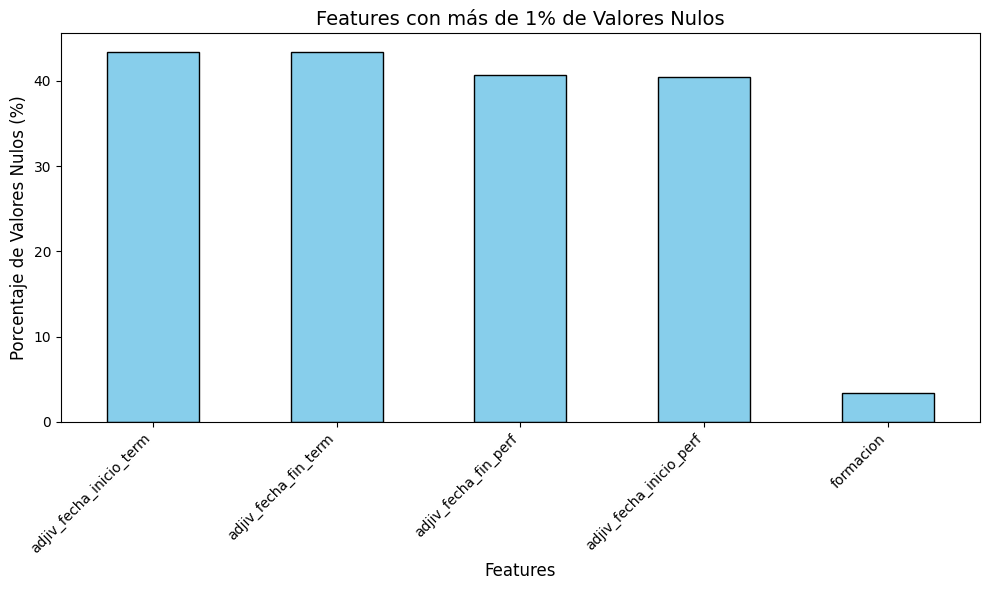

In [35]:

null_percentages = df_pozos_cap4.isnull().mean() * 100
top_nulls = null_percentages[null_percentages > 1].sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
top_nulls.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Atributos con más de 1% de Valores Nulos', fontsize=14)
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Porcentaje de Valores Nulos (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

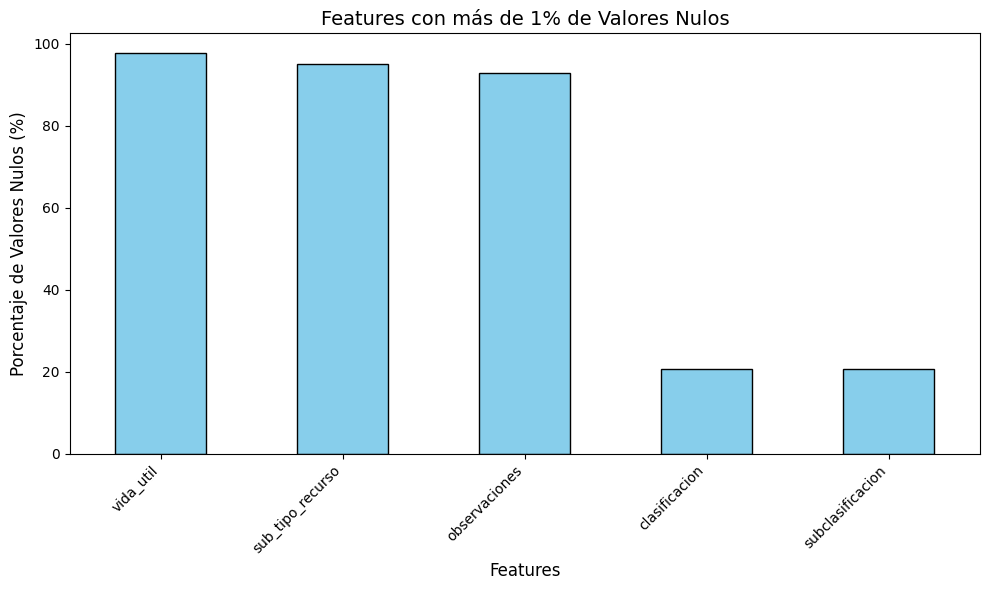

In [36]:
null_percentages = df_pozos_general_2024.isnull().mean() * 100
top_nulls = null_percentages[null_percentages > 1].sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
top_nulls.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Atributos con más de 1% de Valores Nulos', fontsize=14)
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Porcentaje de Valores Nulos (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

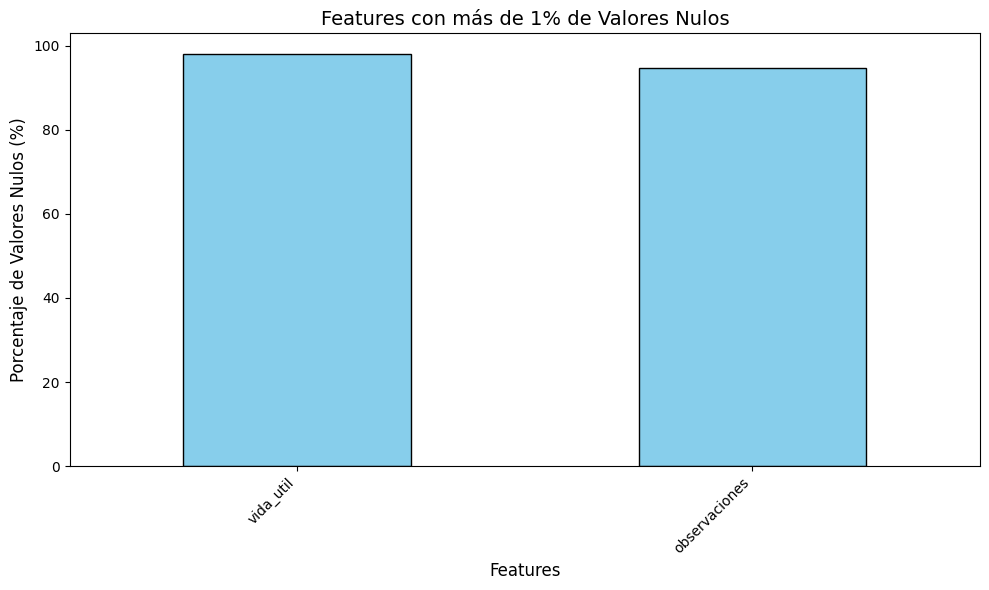

In [37]:
null_percentages = df_pozos_noconvencional.isnull().mean() * 100
top_nulls = null_percentages[null_percentages > 1].sort_values(ascending=False).head()

plt.figure(figsize=(10, 6))
top_nulls.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Atributos con más de 1% de Valores Nulos', fontsize=14)
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Porcentaje de Valores Nulos (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()